In [ ]:
import numpy as np
from math import pi, atan2

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Arc, Rectangle
%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

legend_opts = {
    'fontsize':15,
    'frameon':True, 
    'framealpha':1,
    'facecolor':'white',
    'edgecolor':'black',
    'labelspacing':0.1}

def savefig(fig, filename, **kwargs):
    fig.savefig(f'../viz/{filename}', bbox_inches='tight', **kwargs)

# Box-Muller

## Derivation

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(0, color='tab:gray', lw=1, zorder=10)
ax.axvline(0, color='tab:gray', lw=1, zorder=10)
ax.plot([0, 4], [0, 0], color='tab:purple', zorder=11)
ax.plot([4, 4], [0, 3], color='tab:orange', zorder=11)
ax.plot([0, 4], [0, 3], color='tab:blue', zorder=11)
ax.scatter(4, 3, color='black', zorder=12)

ax.set_xticks(range(-5, 6))
ax.set_yticks(range(-5, 6))

plt.show()
savefig(fig, 'xyr.png')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot([0, 2*pi], [1/(2*pi), 1/(2*pi)], color='tab:gray', lw=2, label='Unif(0,2π)')
ax.plot([0, 0], [0, 1/(2*pi)], '--', lw=1, color='tab:gray')
ax.plot([2*pi, 2*pi], [0, 1/(2*pi)], '--', lw=1, color='tab:gray')
ax.set_xticks([0, 2*pi])
ax.set_xticklabels([0, '2π'])
ax.set_yticks([0, 1/(2*pi), 1])
ax.set_yticklabels([0., r'$\frac{1}{2\pi}$', 1.])
ax.legend(**legend_opts)

ax.set_xlim(-1, 2*pi+1)
ax.set_ylim(0, 1)
ax.set_xlabel('z')
savefig(fig, 'unif.png')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
zs = np.linspace(0, 2*pi+1, 50)
ax.plot(zs, np.exp(-zs), color='tab:gray', lw=2, label='Expo(1)')
ax.legend(**legend_opts)

ax.set_xticks(range(-1, 8))
ax.set_xlim(-1, 7)
ax.set_ylim(0, 1)
ax.set_xlabel('z')
savefig(fig, 'expo.png')

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(0, color='tab:gray', lw=1, zorder=10)
ax.axvline(0, color='tab:gray', lw=1, zorder=10)
ax.plot([0, 4], [0, 3], color='tab:blue', zorder=11)
ax.scatter(4, 3, color='black', zorder=12)
ax.add_patch(Arc((0, 0), 3, 3, theta1=0, theta2=atan2(3,4)*180/pi, edgecolor='tab:red', lw=2))

ax.set_xticks(range(-5, 6))
ax.set_yticks(range(-5, 6))

plt.show()
savefig(fig, 's_theta.png')

## Sampling

In [218]:
# 0. Initialize random number generator
rng = np.random.RandomState(seed=42)

# 1. Generate 1000 U1 and U2, which are Unif(0, 1)
u1s, u2s = rng.uniform(size=1000), rng.uniform(size=1000)

# 2. Tranform U1 to S
ss = -np.log(u1s)

# 3. Transform U2 to theta
thetas = 2*pi*u2s

# 4. Convert s to r
rs = np.sqrt(2*ss)

# 5. Calculate x and y from r and theta
xs, ys = rs*np.cos(thetas), rs*np.sin(thetas)

## Animation

In [219]:
rounded_u1s, rounded_u2s = np.floor(u1s*10)/10, np.floor(u2s*10)/10
rounded_ss, rounded_thetas = np.floor(ss*10)/10, np.floor(thetas*10)/10

In [220]:
def update(i, fig, ax_cdf_s, s_axbottom, ax_hist_s, 
           ax_cdf_theta, ax_hist_u2, ax_hist_theta, ax_xy, verbose=False):
    if verbose and i%100==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    
    # Plot trace lines going from uniform to exponential for S
    ax_cdf_s.scatter(u1s[i], 0, color='tab:green', marker='.', clip_on=False)
    ax_cdf_s.vlines(u1s[i], ss[i], 0, color='tab:green', linewidth=1, linestyles=':')
    ax_cdf_s.scatter(1, ss[i], color='tab:blue', marker='.', clip_on=False)
    ax_cdf_s.hlines(ss[i], u1s[i], 2*pi, color='tab:blue', linewidth=1, linestyles=':')
    
    # Plot trace lines going from uniform to uniform(0, 2*pi) for theta
    ax_cdf_theta.scatter(u2s[i], 2*pi, color='tab:brown', marker='.', clip_on=False)
    ax_cdf_theta.vlines(u2s[i], 2*pi, thetas[i], color='tab:brown', linewidth=1, linestyles=':')
    ax_cdf_theta.scatter(1, thetas[i], color='tab:red', marker='.', clip_on=False)
    ax_cdf_theta.hlines(thetas[i], u2s[i], 2*pi, color='tab:red', linewidth=1, linestyles=':')
    
    # Update histograms when each sample is generated
    u1, u2, s, theta = u1s[i], u2s[i], ss[i], thetas[i]
    rounded_u1, rounded_u2, rounded_s, rounded_theta = rounded_u1s[i], rounded_u2s[i], rounded_ss[i], rounded_thetas[i]

    u1_counts.setdefault(rounded_u1, 0)
    s_axbottom.add_artist(Rectangle((rounded_u1, u1_counts[rounded_u1]), 0.1, 1, facecolor='tab:green'))
    u1_counts[rounded_u1] += 1
    
    u2_counts.setdefault(rounded_u2, 0)
    ax_hist_u2.add_artist(Rectangle((rounded_u2, u2_counts[rounded_u2]), 0.1, 1, facecolor='tab:brown'))
    u2_counts[rounded_u2] += 1

    s_counts.setdefault(rounded_s, 0)
    ax_hist_s.add_artist(Rectangle((s_counts[rounded_s], rounded_s), 1, 0.1, facecolor='tab:blue'))
    s_counts[rounded_s] += 1
    
    theta_counts.setdefault(rounded_theta, 0)
    ax_hist_theta.add_artist(Rectangle((theta_counts[rounded_theta], rounded_theta), 1, 0.1, facecolor='tab:red'))
    theta_counts[rounded_theta] += 1
    
    # Plot each Gaussian sample in the x-y plane, along with a vector for its distance and an arc for its angle
    r, x, y = rs[i], xs[i], ys[i]
    ax_xy.scatter(x, y, color='tab:gray', marker='.')
    # Delete vector and arc from previous animation step
    if ax_xy.artists:
        ax_xy.artists = []
    if ax_xy.patches:
        ax_xy.patches = []
    ax_xy.arrow(0, 0, x, y, head_width=0.2, head_length=0.3, length_includes_head=True, color='tab:blue', lw=2)
    ax_xy.add_patch(Arc((0, 0), 1, 1, theta1=0, theta2=theta*180/pi, edgecolor='tab:red', lw=2))

0
0
100
200
300
400
500
600
700
800
900
0


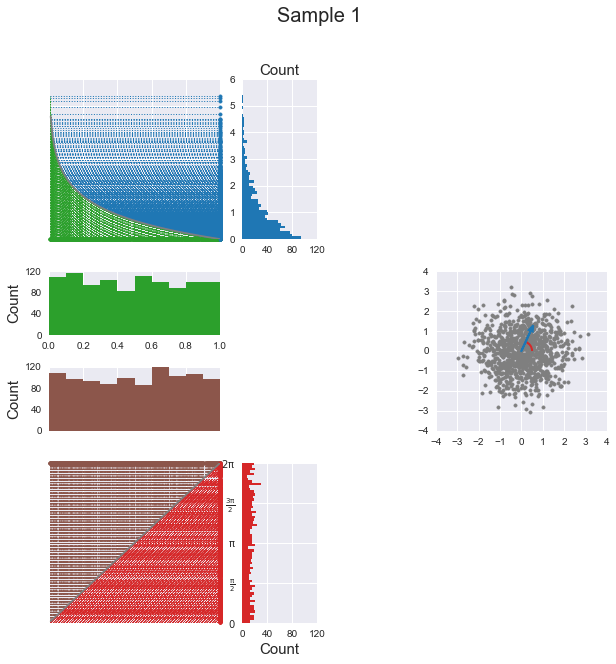

In [221]:
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(6, 6, wspace=0.3, hspace=0.5)
A = np.arange(0.01, 1.01, 0.01)

# Exponential inverse CDF to generate half of squared radius (S)
ax_cdf_s = fig.add_subplot(grid[:2, :2])
ax_cdf_s.plot(A, -np.log(A), color='tab:gray')
ax_cdf_s.set_xlim(0, 1)
ax_cdf_s.set_ylim(0, 6)
plt.setp(ax_cdf_s.get_xticklabels(), visible=False)
plt.setp(ax_cdf_s.get_yticklabels(), visible=False)

# Uniform histogram to count U1 samples that are used to generate S
ax_hist_u1 = fig.add_subplot(grid[2, :2])
ax_hist_u1.set_ylim(0, 120)
ax_hist_u1.set_yticks(np.arange(0, 121, 40))
ax_hist_u1.xaxis.set_label_position('top') 
ax_hist_u1.set_ylabel('Count', fontsize=15)

# Exponential histogram to count generated S samples
ax_hist_s = fig.add_subplot(grid[:2, 2], sharey=ax_cdf_s)
ax_hist_s.set_xlim(0, 120)
ax_hist_s.set_xticks(np.arange(0, 121, 40))
ax_hist_s.set_xlabel('Count', fontsize=15)
ax_hist_s.xaxis.set_label_position('top')

# Uniform inverse CDF to generate angle (theta)
ax_cdf_theta = fig.add_subplot(grid[4:6, :2])
ax_cdf_theta.plot(A, 2*pi*A, color='tab:gray')
ax_cdf_theta.set_xlim(0, 1)
ax_cdf_theta.set_ylim(0, 2*pi)
ax_cdf_theta.set_yticklabels([r'$\mathrm{0}$', r'$\mathrm{\frac{\pi}{2}}$', r'$\mathrm{\pi}$', r'$\mathrm{\frac{3\pi}{2}}$', r'$\mathrm{2\pi}$'], fontsize=20)
plt.setp(ax_cdf_theta.get_xticklabels(), visible=False)
plt.setp(ax_cdf_theta.get_yticklabels(), visible=False)

# Uniform histogram to count U2 samples that are used to generate theta
ax_hist_u2 = fig.add_subplot(grid[3, :2])
ax_hist_u2.set_ylim(0, 120)
ax_hist_u2.set_yticks(np.arange(0, 121, 40))
ax_hist_u2.xaxis.tick_top()
ax_hist_u2.set_ylabel('Count', fontsize=15)
plt.setp(ax_hist_u2.get_xticklabels(), visible=False)

# Uniform histogram to count generated theta samples
ax_hist_theta = fig.add_subplot(grid[4:6, 2], sharey=ax_cdf_theta)
ax_hist_theta.set_xlim(0, 120)
ax_hist_theta.set_xticks(np.arange(0, 121, 40))
ax_hist_theta.set_yticks([0, pi/2, pi, 3*pi/2, 2*pi])

ax_hist_theta.set_xlabel('Count', fontsize=15)

# x-y plane to plot generated Gaussian samples
ax_xy = fig.add_subplot(grid[2:4, 4:6])
ax_xy.set_xlim(-4, 4)
ax_xy.set_ylim(-4, 4)
ax_xy.set_xticks(range(-4, 5))
ax_xy.set_yticks(range(-4, 5))

# Dicts to track how many samples are in each bin of histogram
u1_counts = {}
u2_counts = {}
theta_counts = {}
s_counts = {}

anim = FuncAnimation(fig, lambda i: update(i, fig, ax_cdf_s, ax_hist_u1, ax_hist_s, 
                                           ax_cdf_theta, ax_hist_u2, ax_hist_theta, ax_xy, verbose=True), 
                     frames=range(len(u1s)), interval=50)
anim.save('../viz/box_muller.mp4', writer='ffmpeg')